#  직원 이탈 예측
## 링크 : [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download)
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists

직원의 이직을 유발하는 요인을 밝히고 '직무 및 이직에 따른 집과의 거리 내역 표시' 또는 '교육 및 이직별 평균 월 소득 비교'와 같은 중요한 질문을 탐색합니다. 이것은 IBM 데이터 과학자들이 만든 가상의 데이터 세트입니다.

IBM Watson Analytics에 의해 생성된 시뮬레이션 된 데이터 세트로 여기에는 1470명의 직원 항목과 35개의 공통 기능(월간 수입, 직업 만족도, 성별 등)이 포함되어 있습니다. 그 중 하나는 목표 변수인 Attrition(이직 여부=>예/아니요) 변수입니다. 

## Columns
AGE : 사원 나이 

ATTRITION : 퇴직 여부 ,(YES , NO) , 종속변수

BUSINESS TRAVEL : 출장 빈도, (No Travel, Travel Frequently, Tavel Rarely)

DAILY RATE : 급여 수준

DEPARTMENT : 업무 부서 , (HR, R&D, Sales)

DISTANCE FROM HOME : 집까지 거리

EDUCATION : 교육 정도

EDUCATION FIELD : 전공  (HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TEHCNICAL)

EMPLOYEE COUNT : 직원수

EMPLOYEE NUMBER : 직원 ID

ENVIROMENT SATISFACTION : 업무 환경 만족도

GENDER : 성별 , (FEMALE, MALE)

HOURLY RATE : 시간 대비 급여 수준

JOB INVOLVEMENT :  업무 참여도

JOB LEVEL : 업무 수준

JOB ROLE : 업무 역할(종류), (HC REP, HR, LAB TECHNICIAN, MANAGER, MANAGING DIRECTOR,  REASEARCH DIRECTOR,  RESEARCH SCIENTIST, SALES EXECUTIEVE,  SALES REPRESENTATIVE)

JOB SATISFACTION : 업무 만족도


MARITAL STATUS : 결혼 여부 (DIVORCED, MARRIED, SINGLE)

MONTHLY INCOME : 월 소득 

MONTHY RATE : 월 대비 급여 수준

NUMCOMPANIES WORKED : 이전에 근무한 회수의 개수

OVER 18 : 18세 이상 여부 , (YES, NO )

OVERTIME : 규정외 노동시간, (NO, YES )

PERCENT SALARY HIKE : 급여의 증가분(%)

PERFORMANCE RATING : 업무 성과

RELATIONS SATISFACTION : 대인 관계 만족도

STANDARD HOURS : 표준 근무 시간

STOCK OPTIONS LEVEL : 스톡 옵션 수준

TOTAL WORKING YEARS : 경력 기간

TRAINING TIMES LAST YEAR : 교육 시간

WORK LIFE BALANCE : 일과 삶의 균형 정도(워라벨 지수)

YEARS AT COMPANY : 근속 연수

YEARS IN CURRENT ROLE : 현재 역할을 수행중인 연수

YEARS SINCE LAST PROMOTION : 마지막 프로모션까지의 연수


YEARS WITH CURRENT MANAGER : 현재 관리자와 일한 연수





1. 필요한 라이브러리 설치

In [ ]:
! pip install flaml --quiet
! pip install gradio --quiet

In [2]:
! pip install imblearn

     -------------------------------------- 199.3/199.3 kB 4.0 MB/s eta 0:00:00


2. 라이브러리 불러오기

In [3]:
import flaml
import gradio as gr




#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#MODEL SELECTION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

3. 데이터셋 불러오기

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [6]:
# Train 데이터 불러오기
# df = pd.read_csv(r'/content/gdrive/MyDrive/test/[Dataset]_Module6_WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.shape

(1470, 35)

4. 데이터 분석

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# 1개 값으로 된 것은 컬럼에서 삭제하고자 함.
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
#데이터가 매우 깨끗하고 누락된 값이 없음.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


5. 데이터 시각화

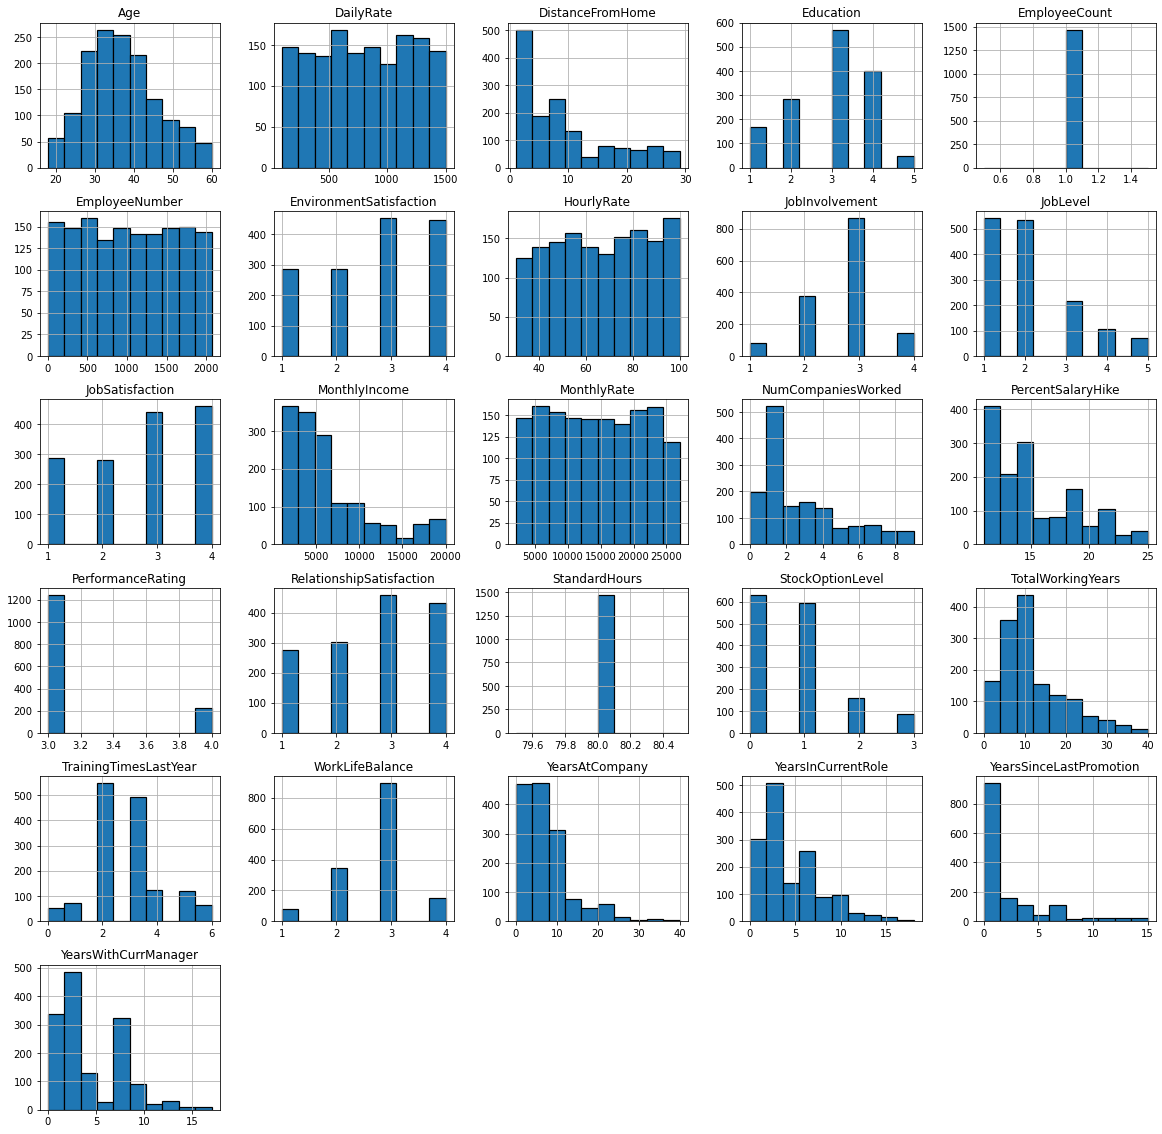

In [14]:
#각 컬럼별 값의 분산형태를 시각화 하여 보여줌.
df.hist(edgecolor='black',linewidth=1.2,figsize=(20,20))
plt.show()



<Figure size 1440x1440 with 0 Axes>

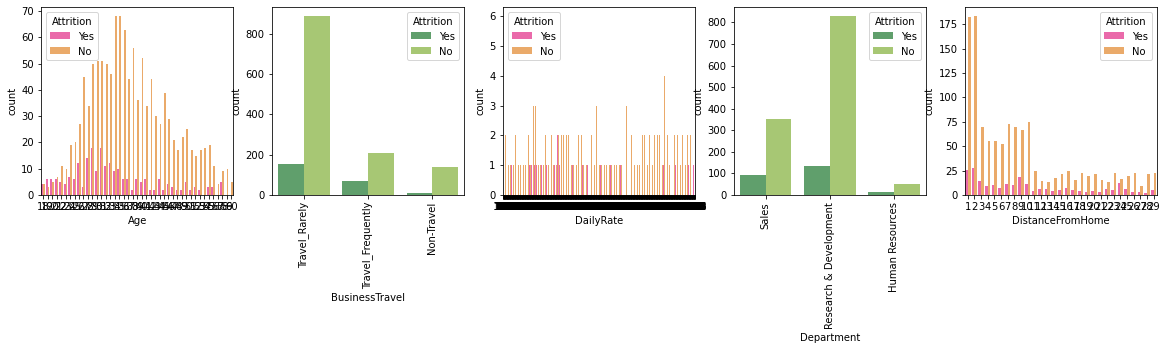

In [17]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''

plt.figure(figsize=(20,20))
plt.subplot(5, 5, 1)
sns.countplot(x='Age', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)
plt.subplot(5,5,2)
sns.countplot(x='BusinessTravel', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)
plt.subplot(5,5,3)
sns.countplot(x='DailyRate', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)
plt.subplot(5,5,4)
sns.countplot(x='Department', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)
plt.subplot(5,5, 5)
sns.countplot(x='DistanceFromHome', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='Education', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='EducationField', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='EmployeeCount', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='EmployeeNumber', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5, 5)
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='Gender', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='HourlyRate', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='JobInvolvement', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='JobLevel', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5, 5)
sns.countplot(x='JobRole', hue='Attrition',data=df,palette='spring')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='JobSatisfaction', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='MaritalStatus', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='MonthlyIncome', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='MonthlyRate', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5, 5)
sns.countplot(x='NumCompaniesWorked', hue='Attrition',data=df,palette='spring')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='Over18', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='OverTime', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='PercentSalaryHike', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='PerformanceRating', hue='Attrition',data=df,palette='summer')
#plt.xticks(rotation=90)

plt.subplot(5,5, 5)
sns.countplot(x='RelationshipSatisfaction', hue='Attrition',data=df,palette='spring')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='StandardHours', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='StockOptionLevel', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='TotalWorkingYears', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='TrainingTimesLastYear', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5, 5)
sns.countplot(x='WorkLifeBalance', hue='Attrition',data=df,palette='spring')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))


''' 
'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager
'''
plt.subplot(5, 5, 1)
sns.countplot(x='YearsAtCompany', hue='Attrition',data=df,palette='spring' , )
#plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.countplot(x='YearsInCurrentRole', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition',data=df,palette='spring')
#plt.xticks(rotation=90)

plt.subplot(5,5,4)
sns.countplot(x='YearsWithCurrManager', hue='Attrition',data=df,palette='summer')
plt.xticks(rotation=90)

plt.show()

높은 상관관계(>0.7 또는 <-0.7) 기능 중 일부는 다음과 같습니다.

월 소득 <-> 총 근무 년수 <-> 직급
회사 재직 기간 <-> 현재 직책 기간 <-> Curr 관리자 재직 기간
급여 인상률 <-> 성과 평가
Age는 총 근로 연수와 중간 정도의 상관 관계가 있으므로 MonthlyIncome, TotalWorkingYears 및 JobLevel을 Age로 대체

In [ ]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot(df['Attrition'] ,color ='b' ,hue =df['Gender'])
plt.title('Attrition by Gender')
plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts() ,colors =['r' ,'c'] ,explode =[0,0.1]  ,autopct = '%.2f' ,labels =['No' ,'Yes'])

plt.title('Attrition')

In [ ]:
plt.figure(figsize =(16 ,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'] ,color ='m')
plt.title('Age')
plt.subplot(1 , 3 ,2)
sns.stripplot(x = 'Gender' ,y = 'Age' ,data = df ,palette="Set2")
plt.title('Gender vs Age')
plt.subplot(1,3,3)
sns.countplot('Gender' ,data = df ,color ='c')
plt.title('Gender')
plt.tight_layout()

In [ ]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('Department' ,data = df ,hue ='Attrition' ,palette='gist_rainbow_r')
plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts() ,autopct ='%.2f' ,colors = ['r' ,'c' ,'g'],labels =['Research & Development','Sales', 'Human Resources'] ,explode =[0 ,0.1,0])

In [ ]:
plt.figure(figsize =(20 ,8))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = df ,hue ='Attrition' ,color ='red')

In [ ]:
plt.figure(figsize =(12,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'MaritalStatus' ,y ='RelationshipSatisfaction' ,data = df ,hue = 'Attrition', color = 'g')
plt.subplot(2,1,2)
sns.boxplot(df['JobLevel'],df['MonthlyIncome'] ,hue = df['Attrition'] ,palette='Reds_r')

In [ ]:
col = ['YearsInCurrentRole' ,'YearsSinceLastPromotion' ,'YearsWithCurrManager' ,'YearsAtCompany']
plt.figure(figsize = (8 ,8))
for i,c in enumerate(col):
    plt.subplot(2 ,2,i+1)
    sns.distplot(df[c] ,color ='b')

In [ ]:
core_cols = ['Attrition', 'Age',  'YearsWithCurrManager', 
 'TotalWorkingYears',    'YearsSinceLastPromotion', 'YearsAtCompany' ]
sns.pairplot(df[core_cols], hue='Attrition', kind='reg', palette='husl')
plt.show()


## CORRELATION MATRIX


In [18]:
corr_val_df = df.corr()
corr_val_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

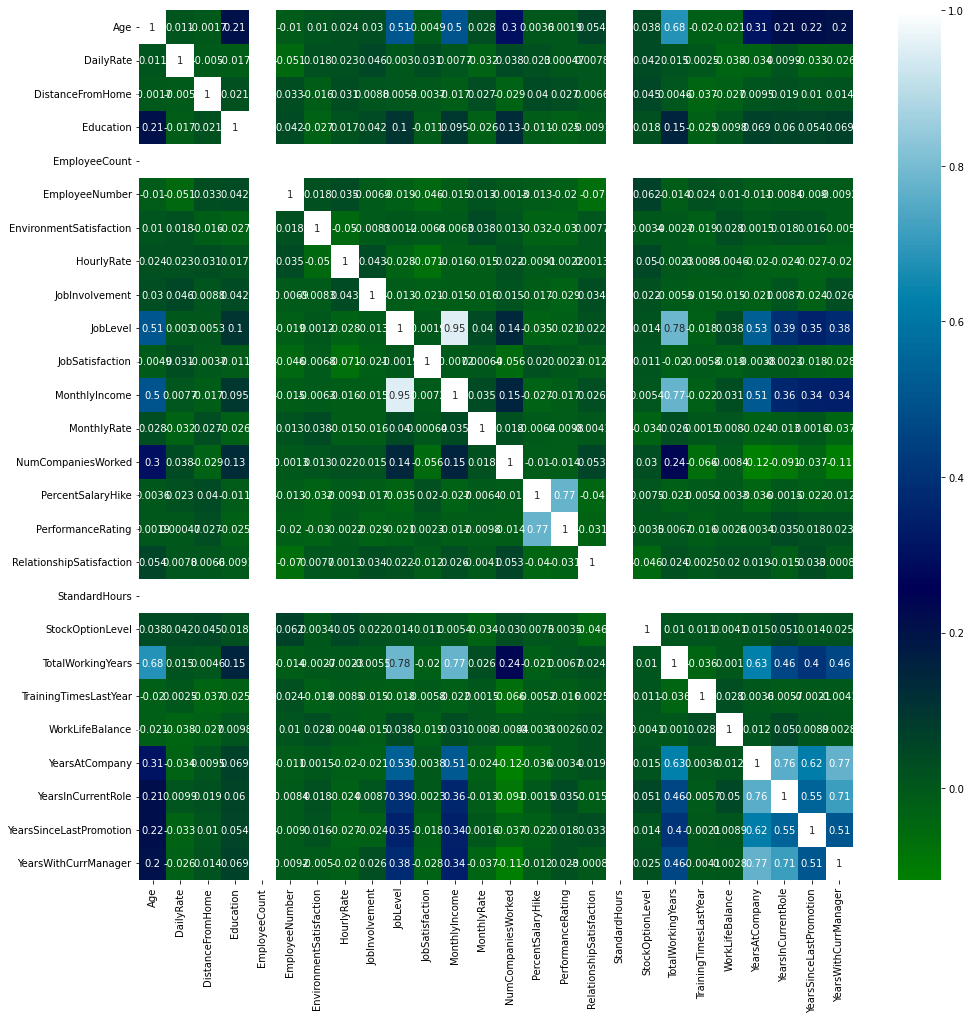

In [19]:
plt.figure(figsize = (16 ,16))
sns.heatmap(corr_val_df ,cmap = 'ocean' , cbar = True , annot = True)

C:\Users\123\AppData\Local\Temp\ipykernel_97720\1841264407.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_val_df, dtype=np.bool)


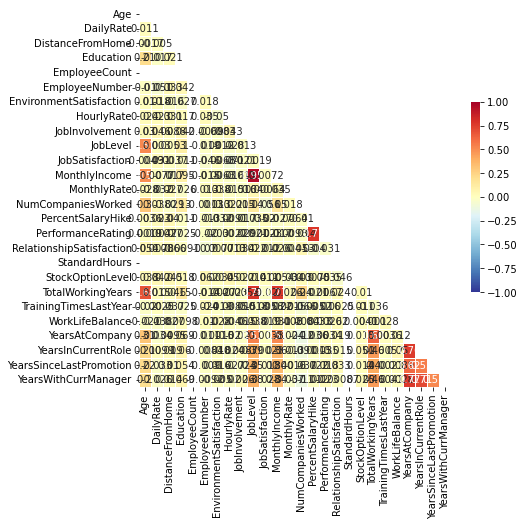

In [20]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(corr_val_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_val_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

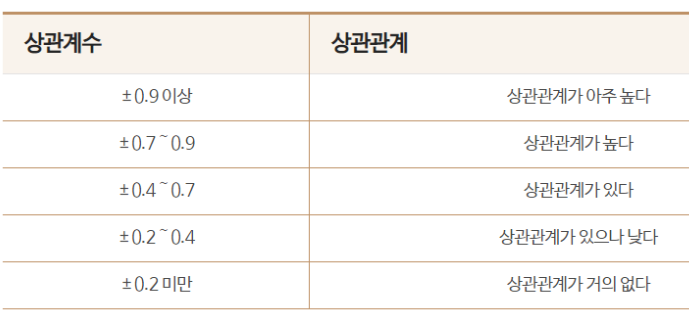

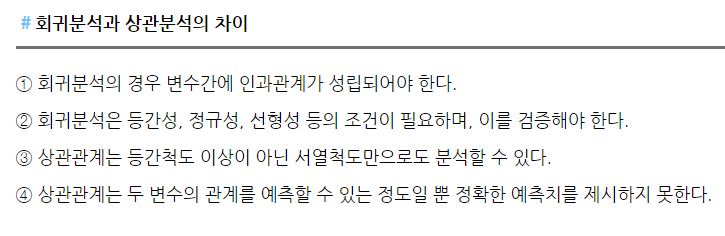

REMOVING IRRELEVANT FEATURES

In [ ]:
print("All columns Unique values count")
remove_cols = []
for col in df:
    if( len(df[col].unique()) == 1 ):
      print(col, len(df[col].unique()), sep=': ')
      remove_cols.append(col)
    else : 
      continue

In [ ]:
df = df.drop('EmployeeCount', axis='columns')

In [ ]:
df = df.drop('Over18', axis='columns')

In [ ]:
df = df.drop("StandardHours", axis='columns')

In [ ]:
#사번은 이직률과 상관이 없으므로 제거
df = df.drop("EmployeeNumber", axis='columns')

In [ ]:
df = df.drop(columns=[ 'TotalWorkingYears',  
                       'YearsInCurrentRole', 'YearsWithCurrManager', 
                      'YearsSinceLastPromotion', 'YearsAtCompany', 'PercentSalaryHike'])

In [ ]:
df = df.drop(columns=['Education', 'EducationField'])

In [ ]:
df = df.drop(columns=['DailyRate', 'HourlyRate', 'Gender' ])


In [ ]:
df = df.drop(columns=['MonthlyIncome','JobLevel' ])


In [ ]:
df = df.drop(columns=['NumCompaniesWorked'])

In [ ]:
df = df.drop(columns=['PerformanceRating', 'RelationshipSatisfaction', 'JobRole'])

In [ ]:
print( df.columns )
print(df.shape)

In [ ]:
corr_val_df2 = df.corr()

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(corr_val_df2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_val_df2, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

BINARY FEATURES ENCODING

CATEGORICAL FEATURES ENCODING

In [ ]:
#숫자 값을 가지는 컬럼들 확인 및 저장
number_column_list = df.select_dtypes('int64' ,'float64').columns
print("수치데이터 컬럼명: ", number_column_list)
print(number_column_list.shape)
print('---------------------------------------------------------')

#객체,문자열 값을 가지는 컬럼들과  값들을  확인 및 저장.
object_column_list = df.select_dtypes('object').columns
print("범주데이터 컬럼명: ", object_column_list)
print(object_column_list.shape)

for object_column in object_column_list:
    print(object_column ,'-> ' , df[object_column].unique())
    print()

In [ ]:
label_enc = LabelEncoder()
for col in object_column_list:
    df[col] = label_enc.fit_transform(df[col])

In [ ]:
df.select_dtypes('object').columns

In [ ]:
df.T

6. 데이터 전처리

SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y


In [ ]:
x = df.drop('Attrition' ,axis =1)
y = df['Attrition']

cols = x.columns.tolist()

print(x.shape ,y.shape)
print('x의 컬럼 : '  , cols)


HANDLING CLASS IMBALANCE

데이터의 약 84%는 클래스 레이블 0에 속하고 데이터의 16%만 클래스 레이블 1에 속합니다.
이것은 클래스 불균형을 만듭니다.
Attrition을 항상 '아니오'로 예측하는 분류기를 생성하더라도 전체 정확도 84%를 달성하므로 의미 없는 제거가 필요합니다.

In [ ]:
sns.countplot(df['Attrition'])

In [ ]:
(df.Attrition.value_counts()/1470)*100

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)

print(x.shape ,y.shape)



In [ ]:
#now balanced
y.value_counts()
sns.countplot(y ,palette='viridis')
plt.title('Now Class is Balanced')

7. AutoML

In [ ]:
# Initialize an AutoML instance
automl =  flaml.AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget":10,  # in seconds
    "metric": 'r2',
    "task": 'regression'
}

#SPLITTING DATA INTO TRAINING AND TESTING SETS
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state= 52)


#scaling the data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#x_train
automl.fit(X_train=x_train, y_train=y_train, **automl_settings)
# Predict
print(automl.predict(x_train).shape)
# Export the best model
print(automl.model)

In [ ]:
print("automl.model.estimator:", automl.model.estimator)
print('Best ML model:', automl.model)
print('Best hyperparameter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

In [ ]:
col_feature = automl.model.estimator.feature_name_
plt.figure(figsize=(5,4))
plt.barh(col_feature, automl.model.estimator.feature_importances_)
plt.title("feature importances")
plt.show()

7. 평가에 필요한 함수 작성

In [ ]:
def metrics(predict, target):
    r2 = round(r2_score(target, predict), 3)
    mae = round(mean_absolute_error(target, predict), 3)
    mse = round(mean_squared_error(target, predict), 3)
    rmse = round(np.sqrt(mean_squared_error(target, predict)), 3)

    metrics_dict = {'R^2': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
    return metrics_dict

8. AutoML이 찾은 모델의 성능 평가

In [ ]:
y_train_pred = automl.predict(x_train)
train_metrics_dict = metrics(y_train_pred, y_train)
print("Train : ", train_metrics_dict)
y_test_pred = automl.predict(x_test)
test_metrics_dict = metrics(y_test_pred, y_test)
print("Test : ", test_metrics_dict)

9. AutoML이 찾은 모델의 하이퍼파라미터 등 확인

In [ ]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4f}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4f} s'.format(automl.best_config_train_time))
print('Best estimator:', automl.best_estimator)

10. 데이터의 각 항목이 결과에 영향을 미치는 정도 파악

In [ ]:
plt.barh(x.columns, automl.model.estimator.feature_importances_)

In [ ]:
perm_importance = permutation_importance(automl.model, x_train, y_train)

In [ ]:
perm_importance

In [ ]:
perm_importance.importances_mean

In [ ]:
x.columns

In [ ]:
cols = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance']

features = np.array(cols)
plt.figure(figsize = (14 ,10))    
sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot( perm_importance.importances_mean[sorted_idx] ,features[sorted_idx] )
plt.xlabel("Permutation Importance")

plt.title('FEATURE IMPORTANCE')

11. 배포

In [ ]:
def predict(*args):
    data = np.array([args])
    return automl.predict(data)[0]

In [ ]:
#getting predict on train set
y_train_pred = automl.predict(x_train)
y_train_pred[:10]

In [ ]:
y_train[:10]

In [ ]:
cl = df.columns
for col in cl:
    print(col ,'-> ' , df[col].unique())
    print()


In [ ]:
number = gr.components.Number
radio = gr.components.Radio

param = {}
param['Age'] = number(value=0, label="나이")
param['StockOptionLevel'] =radio([0, 1, 2, 3], value=0, label="스톡옵션레벨(없음: 0, 낮음: 1, 보통: 2, 높음: 3)")
param['MonthlyRate'] = number(value=0, label='월대비급여수준')
param['DistanceFromHome '] = number(value=0, label="출퇴근 거리 0~40 값 입력")
param['JobInvolvement'] =radio([1, 2, 3, 4], value=1, label="업무참여도( 참여도 낮음: 1, 참여도 보통: 2, 참여도 높음: 3, 참여도 매우 높음: 4)")
param['EnvironmentSatisfaction '] =radio([1, 2, 3, 4], value=1, label="근무환경만족도( 만족도 낮음: 1, 만족도 보통: 2, 만족도 높음: 3, 만족도 매우 높음: 4)")
param['JobSatisfaction'] =radio([1, 2, 3, 4], value=1, label="직업만족도( 만족도 낮음: 1, 만족도 보통: 2, 만족도 높음: 3, 만족도 매우 높음: 4)")
param['TrainingTimesLastYear  '] = number(value=0, label="교육참여시간  0~10 값 입력")
param['BusinessTravel '] =radio([0, 1, 2], value=0, label="출장 강도 레벨(없음: 0 , 보통: 1, 자주: 2)")
param['WorkLifeBalance  '] =radio([1, 2, 3, 4], value=1, label="워라벨지수 ( 낮음: 1 , 보통: 2, 높음: 3, 매우높음:4)")
param['OverTime'] = radio([0, 1], value=0, label="초과근무여부(없음: 0, 있음: 1)")
param['MaritalStatus'] = radio([0, 1, 2], value=0, label="결혼 여부 (DIVORCED:0, MARRIED:1, SINGLE:2)")
param['Department'] = radio([0, 1, 2], value=0, label="업무 부서 , (HR:0, R&D:1, Sales:2)")

param_list = [param[i] for i in param]

gr.Interface(predict, 
             param_list, "label",
             allow_flagging='never', live=True).launch(share=True)

In [ ]:
df.T